In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
data = pd.read_csv('..\INFY_for_ml.csv', index_col=0)
data

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,Target
0,19778560,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644,1
1,20786048,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262,1
2,25256320,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353,1
3,20469632,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243,1
4,12953792,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977,1
...,...,...,...,...,...,...,...,...,...,...
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811,1
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381,-1
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501,-1
6158,3623321,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594,47.407003,1


The first step is to separate the features and the target variable.

In [16]:
features = data.drop(['Target','EMA200'], axis=1)
target = data['Target']
features

,Volume,EMA9,EMA20,EMA50,EMA100,EMA500,MACD,RSI
0,19778560,61.285038,65.265204,69.784212,71.959252,74.019727,-0.756295,37.852644
1,20786048,61.839990,65.150403,69.559725,71.802828,73.979967,-0.259355,44.944262
2,25256320,62.721762,65.255017,69.429887,71.692848,73.949104,0.237225,49.197353
3,20469632,63.647328,65.454501,69.348307,71.606843,73.922758,0.637554,51.237243
4,12953792,65.029413,65.940525,69.395736,71.586069,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1533.066662,-1.640194,50.438811
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1534.407668,-4.269369,50.862381
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1535.684191,-6.876149,47.745501
6158,3623321,1877.364046,1871.376780,1842.041094,1791.353025,1536.949222,-8.473594,47.407003


Now lets split the data into training sets and test sets.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
X_train

,Volume,EMA9,EMA20,EMA50,EMA100,EMA500,MACD,RSI
0,19778560,61.285038,65.265204,69.784212,71.959252,74.019727,-0.756295,37.852644
1,20786048,61.839990,65.150403,69.559725,71.802828,73.979967,-0.259355,44.944262
2,25256320,62.721762,65.255017,69.429887,71.692848,73.949104,0.237225,49.197353
3,20469632,63.647328,65.454501,69.348307,71.606843,73.922758,0.637554,51.237243
4,12953792,65.029413,65.940525,69.395736,71.586069,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...
4923,5368416,627.317151,621.102490,620.381151,626.487862,570.715637,1.472328,57.561846
4924,2112415,628.483945,622.249979,620.881935,626.619808,570.964880,1.318755,59.523534
4925,5658200,629.047898,623.112239,621.290632,626.712558,571.205754,0.991046,57.953263
4926,7882938,631.441016,624.817120,622.064077,626.995745,571.484427,1.306665,63.415968


Use RandomForestClassifer to train and predict the values.

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.49188311688311687

X_train and X_test has some very large values and some very small values, hence we will standardize the data for better results.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Use RandomForestClassifer to train and predict the values.

In [20]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_split=10, criterion='log_loss')
clf.fit(X_train_scaled, y_train)
y_pred2 = clf.predict(X_test_scaled)

Now lets evaluate the models performance

In [21]:
clf.score(X_test_scaled, y_test)

0.474025974025974

Train the same model with shuffled data

In [22]:
np.random.seed(42)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(features, target, test_size=0.2) 
X_train_shuffled_scaled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled_scaled = scaler.transform(X_test_shuffled)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42, max_features='log2', min_samples_split=10, criterion='log_loss')
clf2.fit(X_train_shuffled_scaled, y_train_shuffled)
y_pred3 = clf2.predict(X_test_shuffled_scaled)
clf2.score(X_test_shuffled_scaled, y_test_shuffled)

0.5016233766233766

### Evaluate the model using cross_val_score.

In [23]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf, features, target)

array([0.47077922, 0.4724026 , 0.48863636, 0.48701299, 0.51542208])

In [24]:
cross_val_score(clf2, features, target)

array([0.47077922, 0.4724026 , 0.48863636, 0.48701299, 0.51542208])

### Evaluate the model using confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_shuffled, y_pred3)
pd.crosstab(y_test_shuffled, y_pred3, colnames=['Predicted'], rownames=['Actual'])

Predicted,-1,1
Actual,,
-1,268,338
1,276,350


### Display the confusion matrix using the Heatmap.

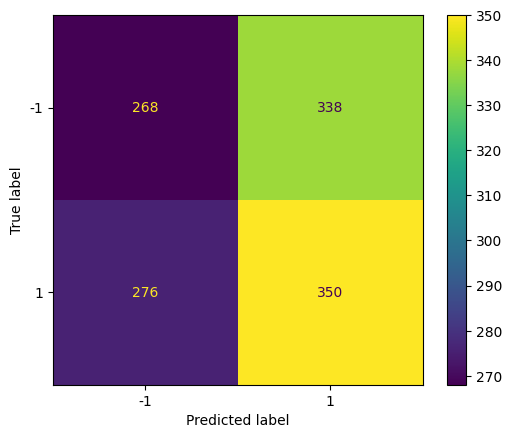

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf2, X=X_test_shuffled_scaled, y=y_test_shuffled.values);